## Student Performance Indicator


#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [5]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [9]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [13]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [14]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [15]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [16]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


#####  Insights
 - From above values we get students have performed the worst in Maths 
 - Best performance is in reading section

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

#### 4.1.1 Histogram & KDE

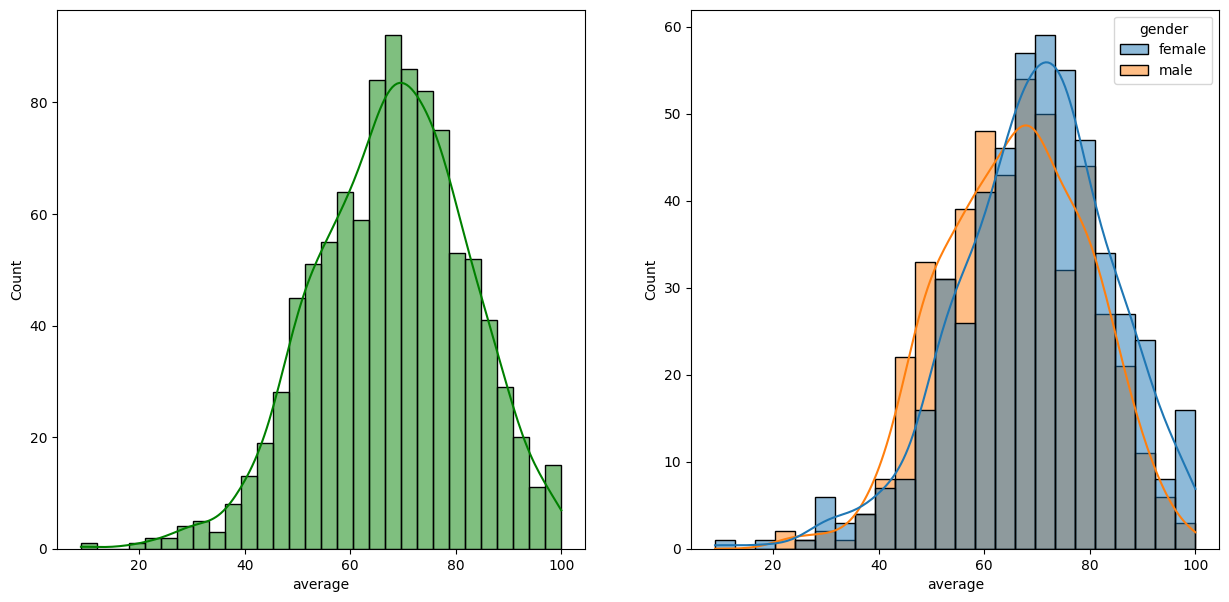

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

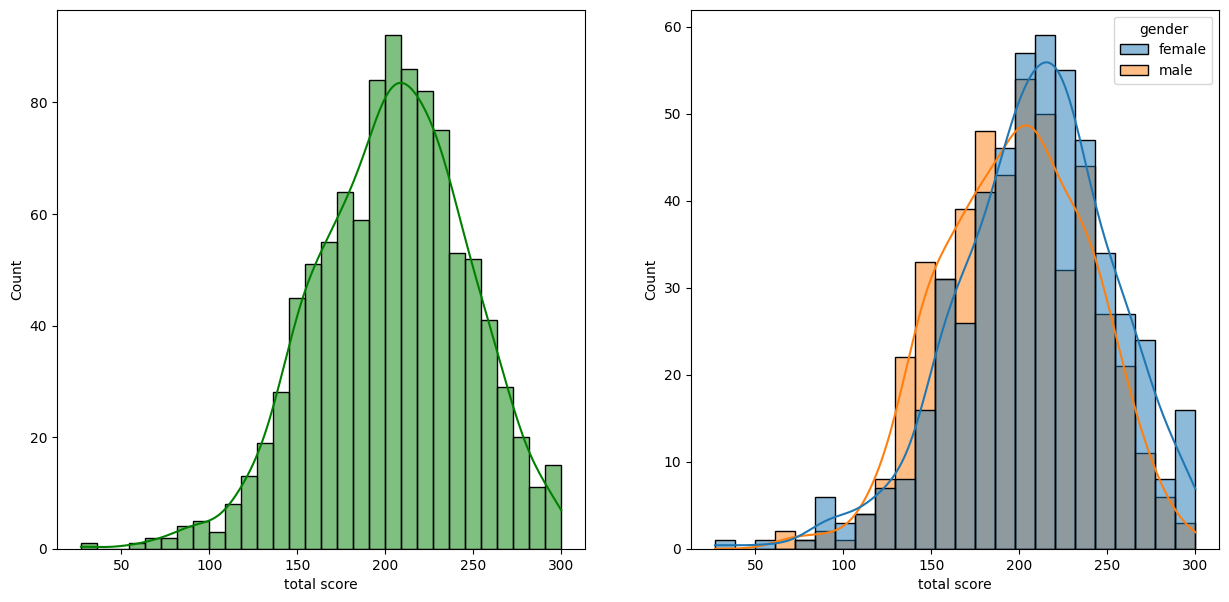

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

#####  Insights
- Female students tend to perform well then male students.

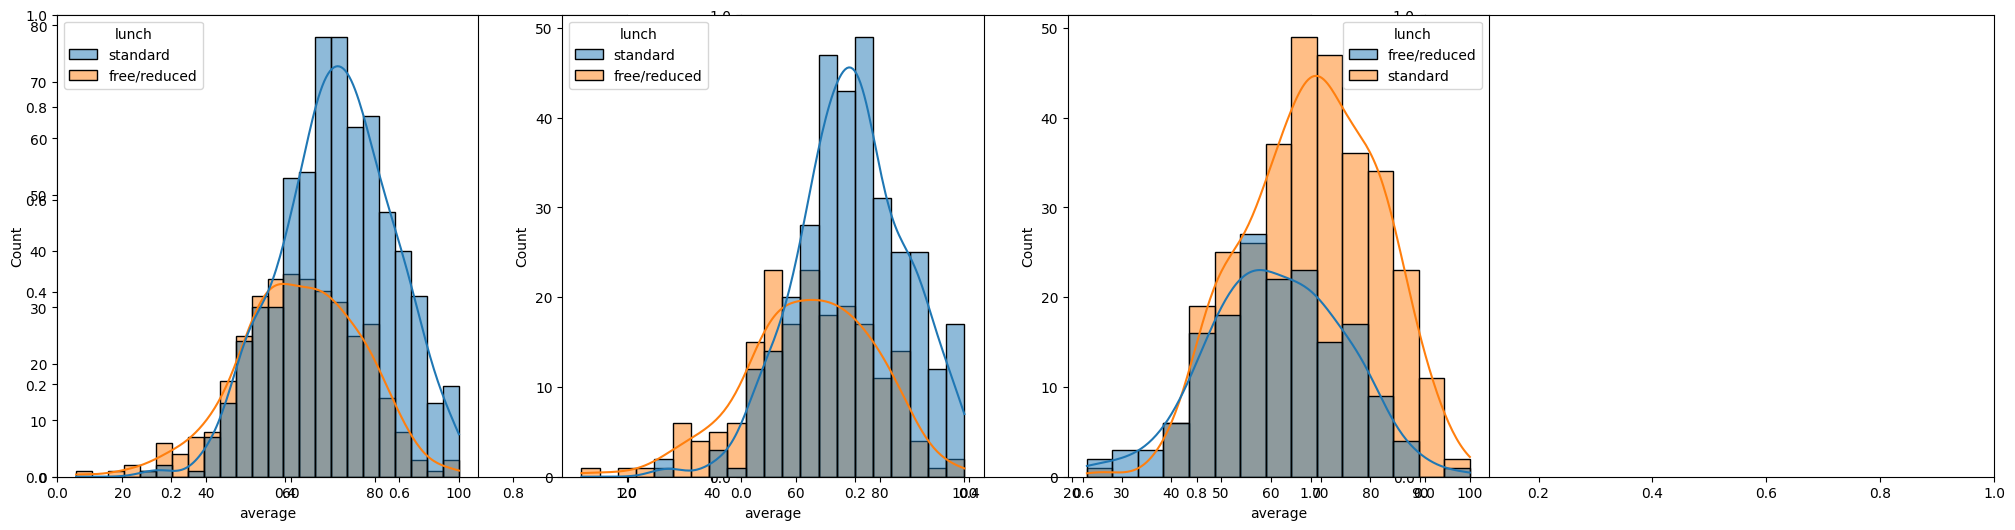

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

#####  Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

In [25]:
print("Actual column names:")
print(df.columns.tolist())
print("\nDataFrame info:")
df.info()

Actual column names:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null 

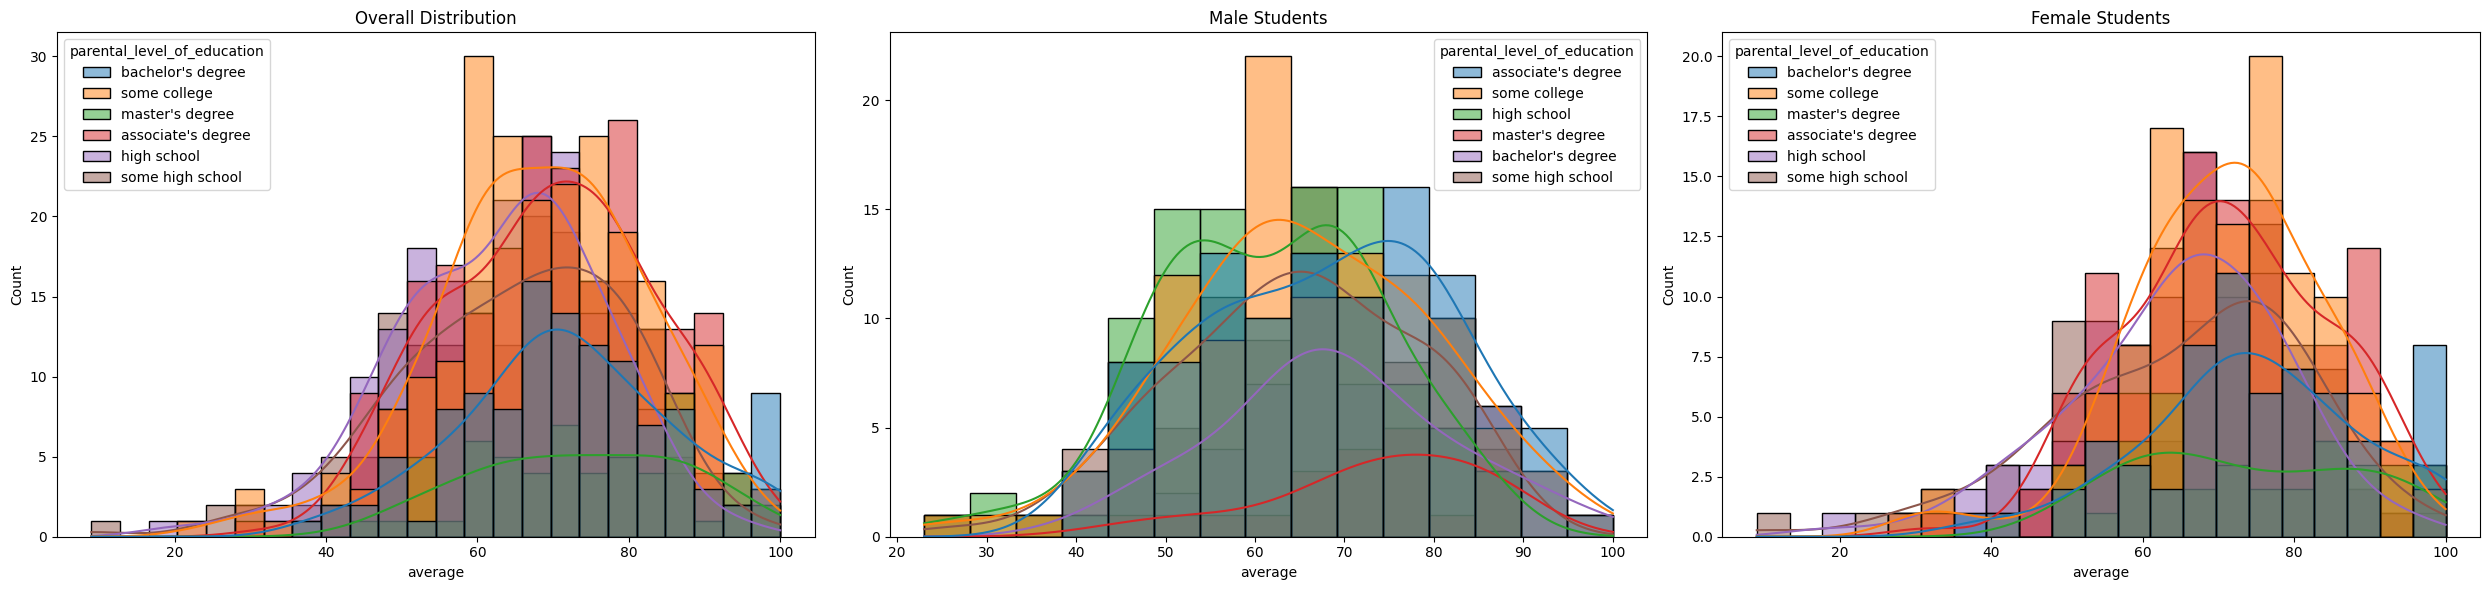

In [26]:
# Check if columns exist and fix the subplot layout
plt.subplots(1,3,figsize=(25,6))  # Changed to 1,3 since you only have 3 subplots

plt.subplot(131)  # Changed from 141 to 131
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')  # Changed column name
plt.title('Overall Distribution')

plt.subplot(132)  # Changed from 142 to 132
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')  # Changed column name
plt.title('Male Students')

plt.subplot(133)  # Changed from 143 to 133
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')  # Changed column name
plt.title('Female Students')

plt.tight_layout()
plt.show()

#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

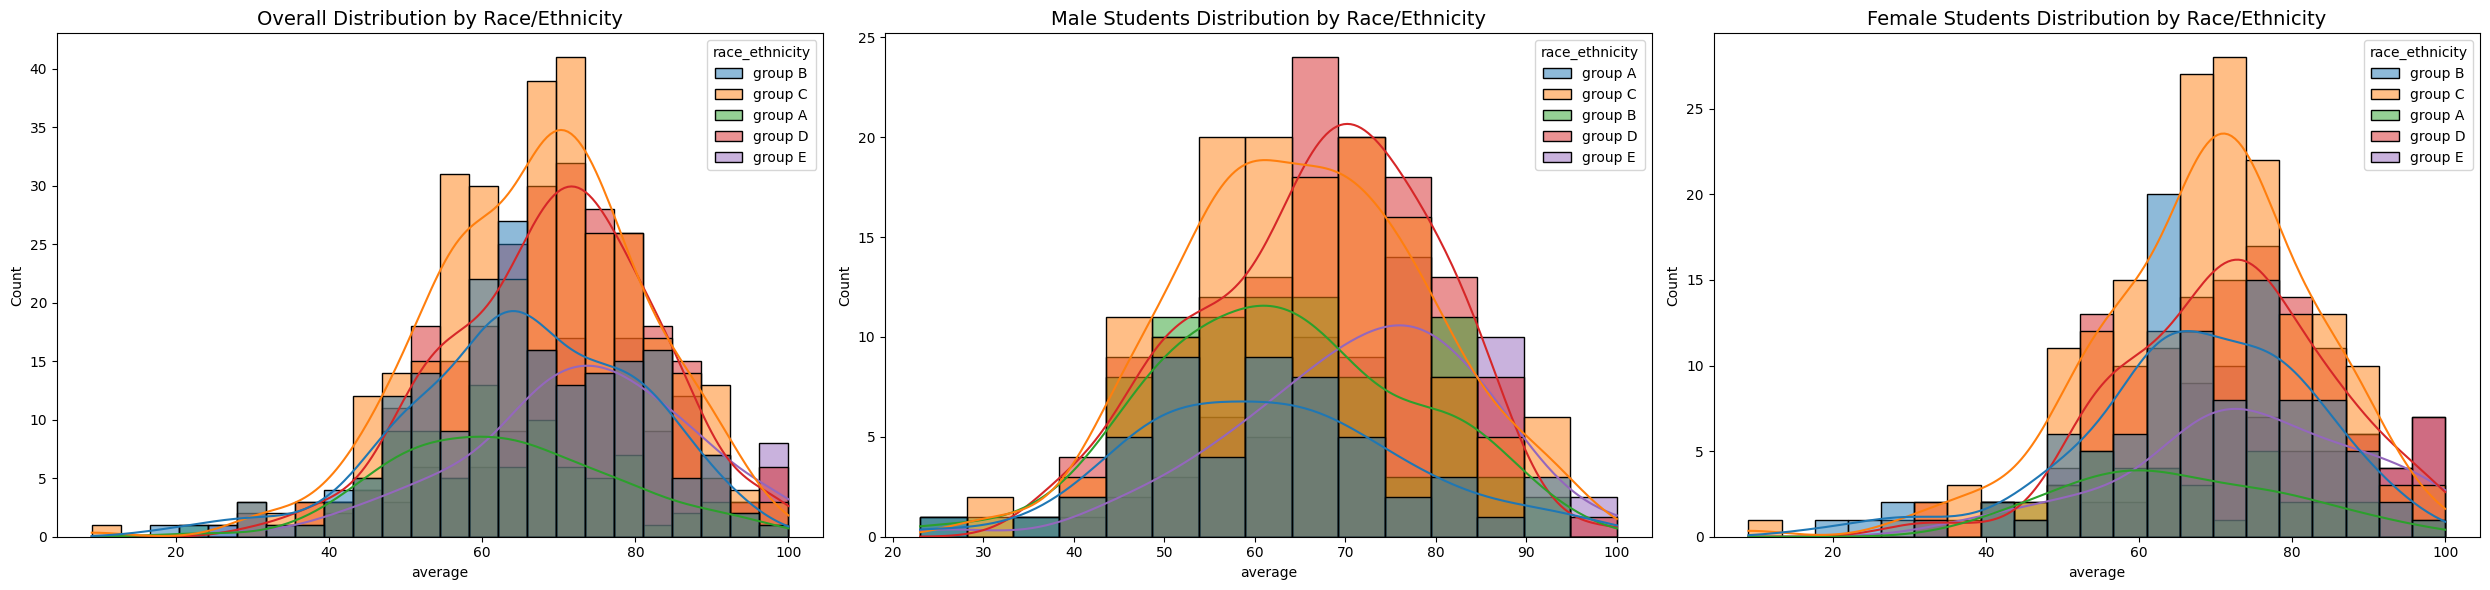

In [27]:
plt.subplots(1,3,figsize=(25,6))

plt.subplot(131)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.title('Overall Distribution by Race/Ethnicity', fontsize=14)

plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.title('Male Students Distribution by Race/Ethnicity', fontsize=14)

plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')
plt.title('Female Students Distribution by Race/Ethnicity', fontsize=14)

plt.tight_layout()
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Maximumum score of students in all three subjects

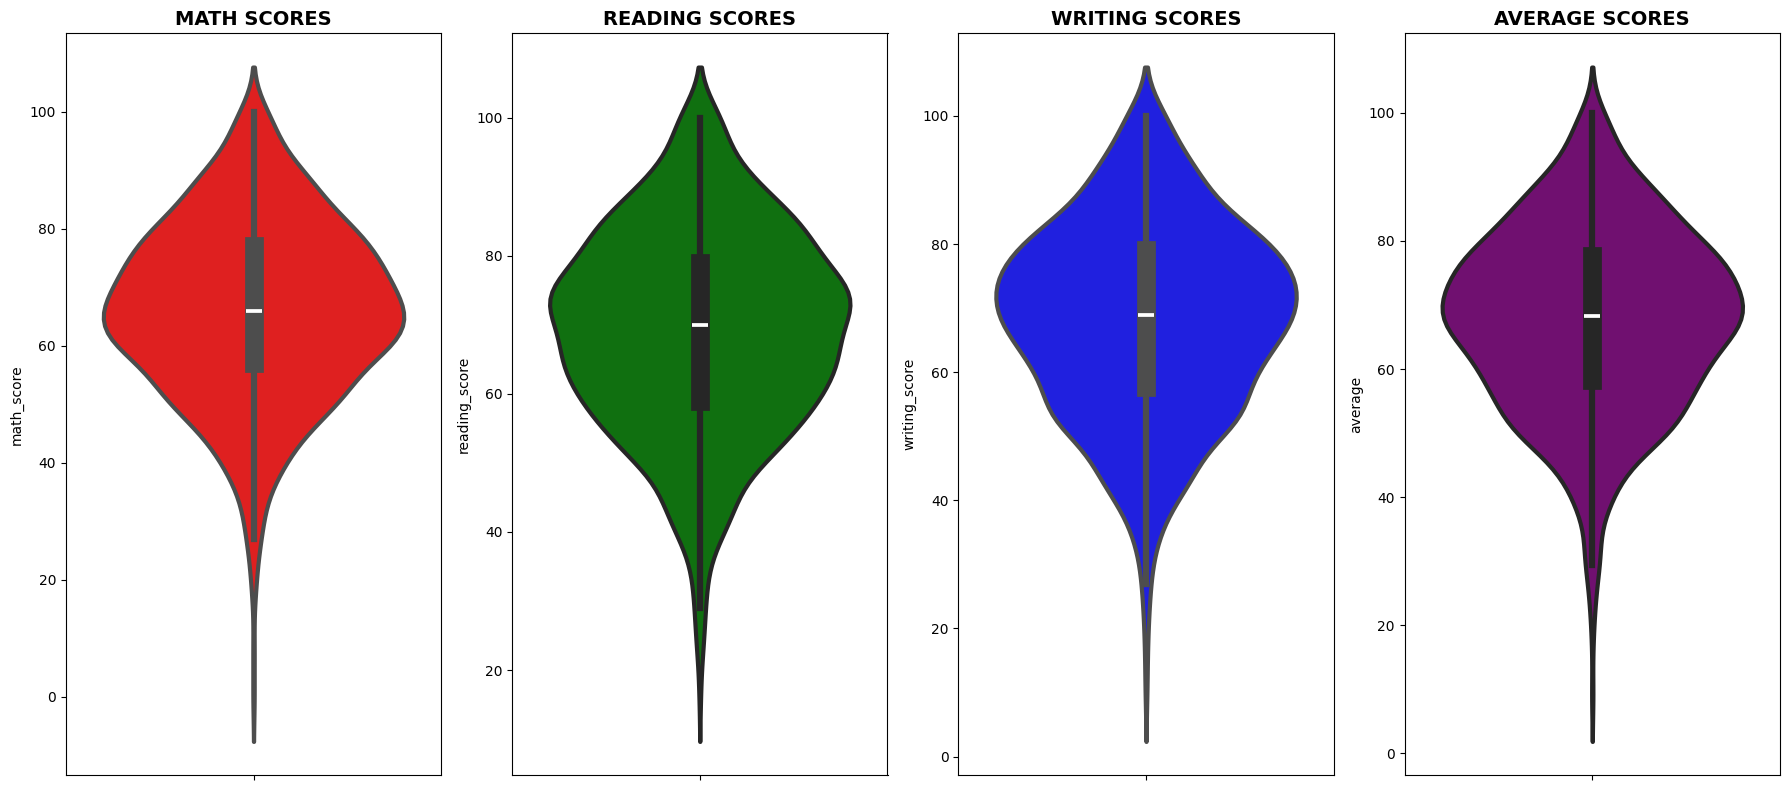

In [28]:
plt.figure(figsize=(18,8))

plt.subplot(1, 4, 1)
plt.title('MATH SCORES', fontsize=14, fontweight='bold')
sns.violinplot(data=df, y='math_score', color='red', linewidth=3)

plt.subplot(1, 4, 2)
plt.title('READING SCORES', fontsize=14, fontweight='bold')
sns.violinplot(data=df, y='reading_score', color='green', linewidth=3)

plt.subplot(1, 4, 3)
plt.title('WRITING SCORES', fontsize=14, fontweight='bold')
sns.violinplot(data=df, y='writing_score', color='blue', linewidth=3)

plt.subplot(1, 4, 4)
plt.title('AVERAGE SCORES', fontsize=14, fontweight='bold')
sns.violinplot(data=df, y='average', color='purple', linewidth=3)

plt.tight_layout()
plt.show()

#### Insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

DataFrame columns:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']

Column names with quotes to see spaces:
'gender'
'race_ethnicity'
'parental_level_of_education'
'lunch'
'test_preparation_course'
'math_score'
'reading_score'
'writing_score'
'total score'
'average'


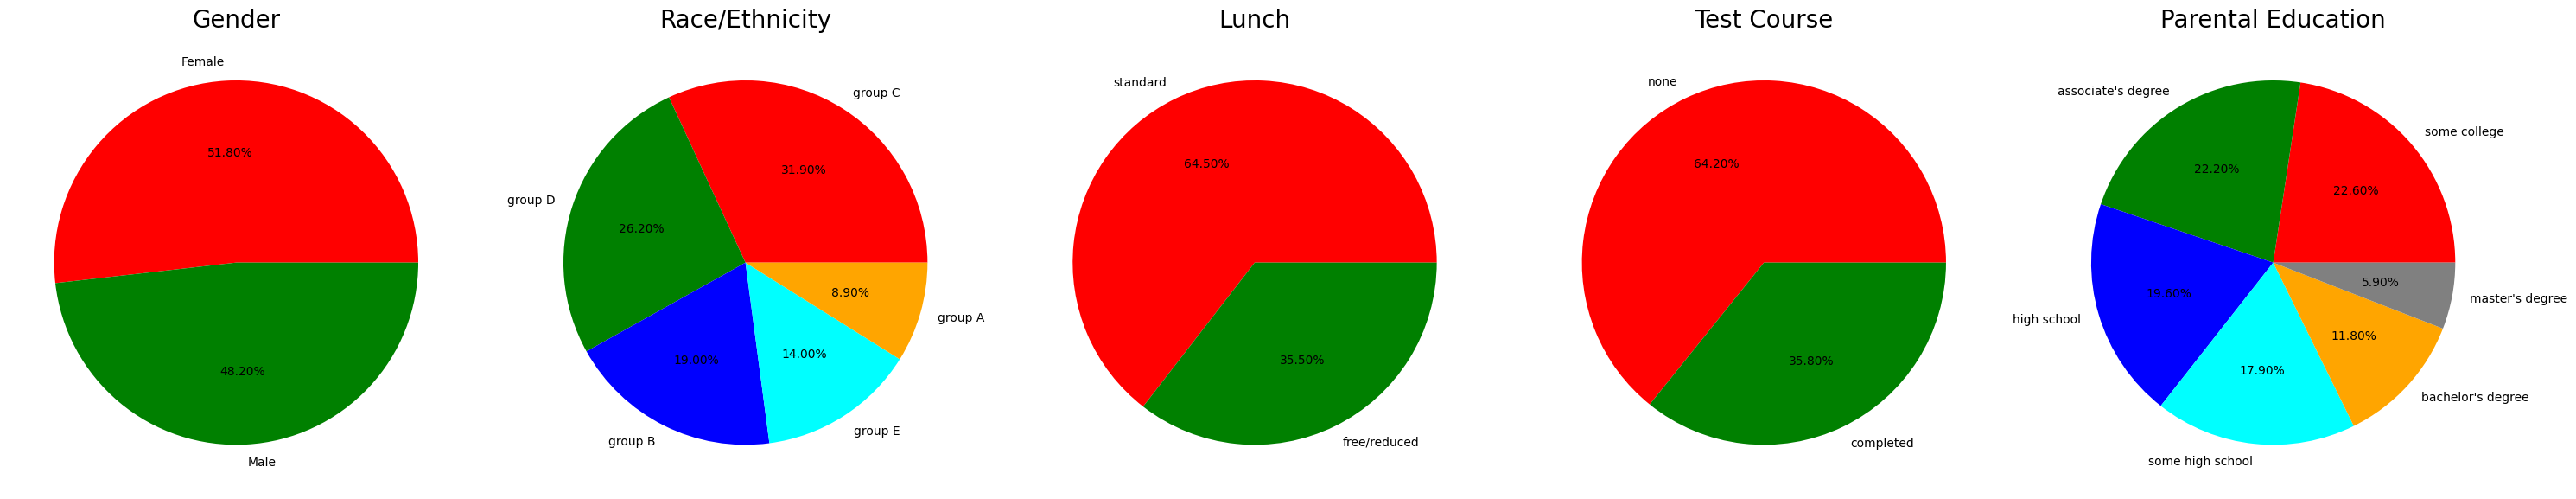

In [29]:
# First, check your DataFrame columns to see the exact names
print("DataFrame columns:")
print(df.columns.tolist())
print("\nColumn names with quotes to see spaces:")
for col in df.columns:
    print(f"'{col}'")

# Once you identify the correct column names, use this corrected code:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (30, 12)

# Gender pie chart
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Race/Ethnicity pie chart - adjust column name as needed
plt.subplot(1, 5, 2)
# Try one of these column names based on what you see in the output above:
# size = df['race/ethnicity'].value_counts()  # if this is the exact name
# size = df['race_ethnicity'].value_counts()   # if it uses underscore
# size = df[' race/ethnicity'].value_counts()  # if there's a leading space
# size = df['race/ethnicity '].value_counts()  # if there's a trailing space

# For now, let's use a generic approach that will work regardless:
race_col = [col for col in df.columns if 'race' in col.lower() or 'ethnicity' in col.lower()][0]
size = df[race_col].value_counts()
labels = size.index.tolist()  # Use actual category names from data
color = ['red', 'green', 'blue', 'cyan', 'orange'][:len(labels)]
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Lunch pie chart
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index.tolist()  # Use actual labels from data
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Test preparation course pie chart
plt.subplot(1, 5, 4)
test_col = [col for col in df.columns if 'test' in col.lower() or 'preparation' in col.lower()][0]
size = df[test_col].value_counts()
labels = size.index.tolist()  # Use actual labels from data
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

# Parental education pie chart
plt.subplot(1, 5, 5)
edu_col = [col for col in df.columns if 'parental' in col.lower() or 'education' in col.lower()][0]
size = df[edu_col].value_counts()
labels = size.index.tolist()  # Use actual labels from data
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey'][:len(labels)]
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

#### 4.4 Feature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender ?
- Is gender has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is distribution of Gender ? )

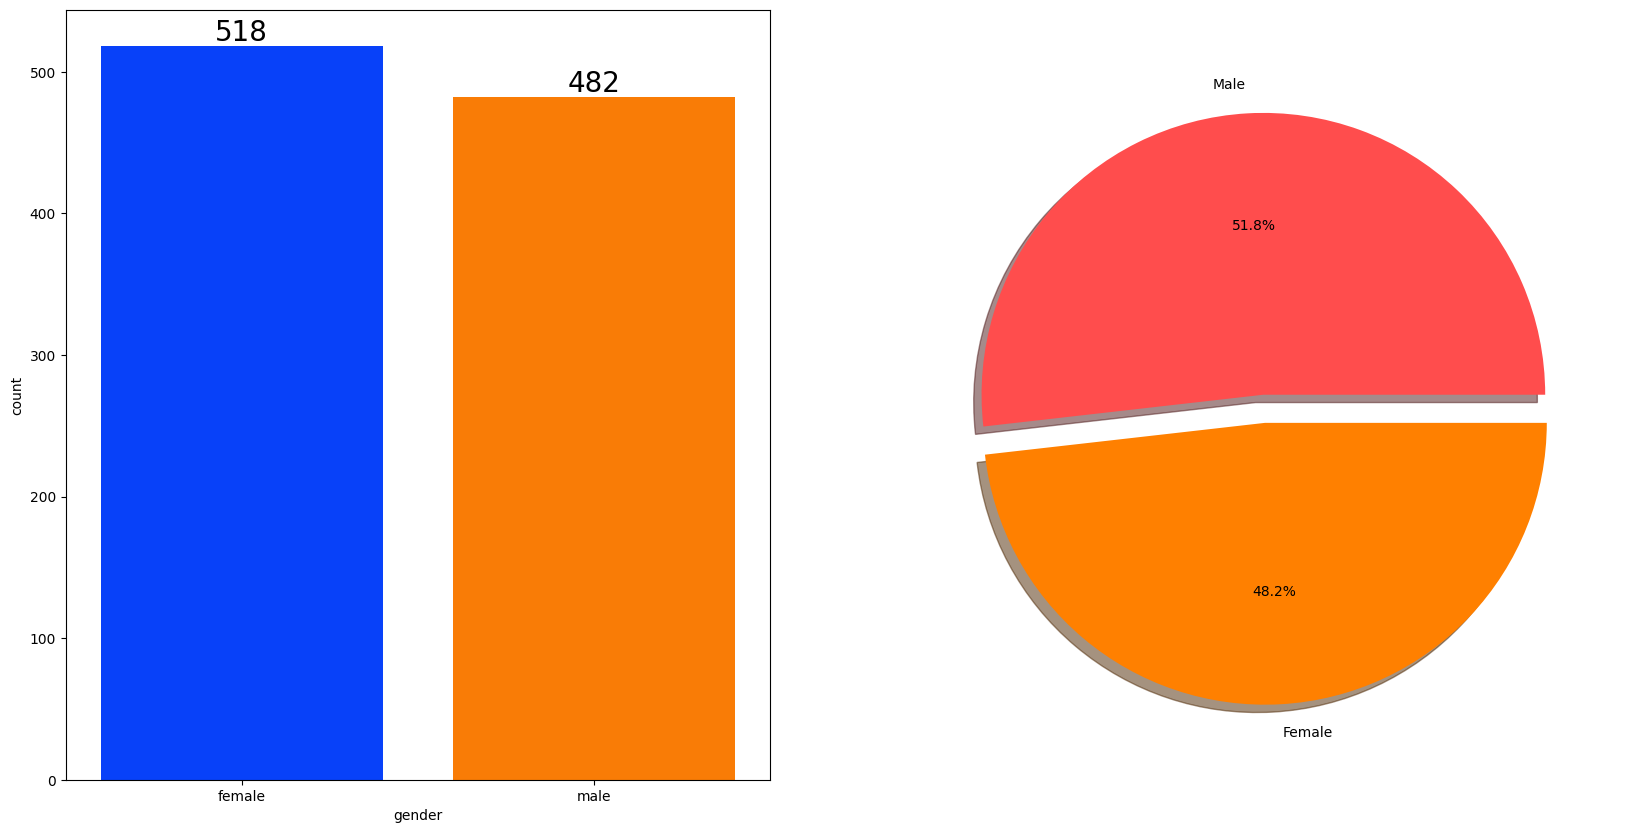

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [31]:
# First, let's see what columns we have and their data types
print("DataFrame info:")
print(df.dtypes)
print("\nDataFrame columns:")
print(df.columns.tolist())

# Solution 1: Get mean of only numeric columns
gender_group = df.groupby('gender').mean(numeric_only=True)
print("\nMean of numeric columns grouped by gender:")
print(gender_group)

# Solution 2: If you want to specify exact columns (assuming these are your score columns)
# Adjust column names based on what you see in the output above
score_columns = ['math score', 'reading score', 'writing score']  # Common column names

# Check if these columns exist and select only the ones that do
existing_score_cols = [col for col in score_columns if col in df.columns]

if existing_score_cols:
    gender_group_scores = df.groupby('gender')[existing_score_cols].mean()
    print(f"\nMean of score columns {existing_score_cols} grouped by gender:")
    print(gender_group_scores)
else:
    # If column names are different, find numeric columns automatically
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    print(f"\nNumeric columns found: {numeric_cols}")
    
    if numeric_cols:
        gender_group_auto = df.groupby('gender')[numeric_cols].mean()
        print("\nMean of all numeric columns grouped by gender:")
        print(gender_group_auto)

# Solution 3: More comprehensive analysis with additional statistics
print("\n" + "="*50)
print("COMPREHENSIVE GENDER ANALYSIS")
print("="*50)

# Get numeric columns only
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

if len(numeric_columns) > 0:
    # Mean
    gender_mean = df.groupby('gender')[numeric_columns].mean()
    print("\nMean scores by gender:")
    print(gender_mean)
    
    # Standard deviation
    gender_std = df.groupby('gender')[numeric_columns].std()
    print("\nStandard deviation by gender:")
    print(gender_std)
    
    # Count
    gender_count = df.groupby('gender').size()
    print("\nCount by gender:")
    print(gender_count)
    
    # Summary statistics
    gender_describe = df.groupby('gender')[numeric_columns].describe()
    print("\nDetailed statistics by gender:")
    print(gender_describe)
else:
    print("No numeric columns found for analysis!")

# Solution 4: If you want to include categorical analysis too
print("\n" + "="*50)
print("CATEGORICAL ANALYSIS BY GENDER")
print("="*50)

categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns = categorical_columns[categorical_columns != 'gender']  # Exclude gender itself

for col in categorical_columns:
    if col != 'gender':
        print(f"\n{col} distribution by gender:")
        cross_tab = pd.crosstab(df['gender'], df[col])
        print(cross_tab)

DataFrame info:
gender                          object
race_ethnicity                  object
parental_level_of_education     object
lunch                           object
test_preparation_course         object
math_score                       int64
reading_score                    int64
writing_score                    int64
total score                      int64
average                        float64
dtype: object

DataFrame columns:
['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course', 'math_score', 'reading_score', 'writing_score', 'total score', 'average']

Mean of numeric columns grouped by gender:
        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483

Numeric columns found: ['math_score', 'reading_score'

Gender group columns:
['math_score', 'reading_score', 'writing_score', 'total score', 'average']

Gender group data:
        math_score  reading_score  writing_score  total score    average
gender                                                                  
female   63.633205      72.608108      72.467181   208.708494  69.569498
male     68.728216      65.473029      63.311203   197.512448  65.837483

Gender group index:
['female', 'male']
Using math column: 'math_score'
Gender order in data: ['female', 'male']
Female scores: [np.float64(69.56949806949807), np.float64(63.633204633204635)]
Male scores: [np.float64(65.8374827109267), np.float64(68.72821576763485)]


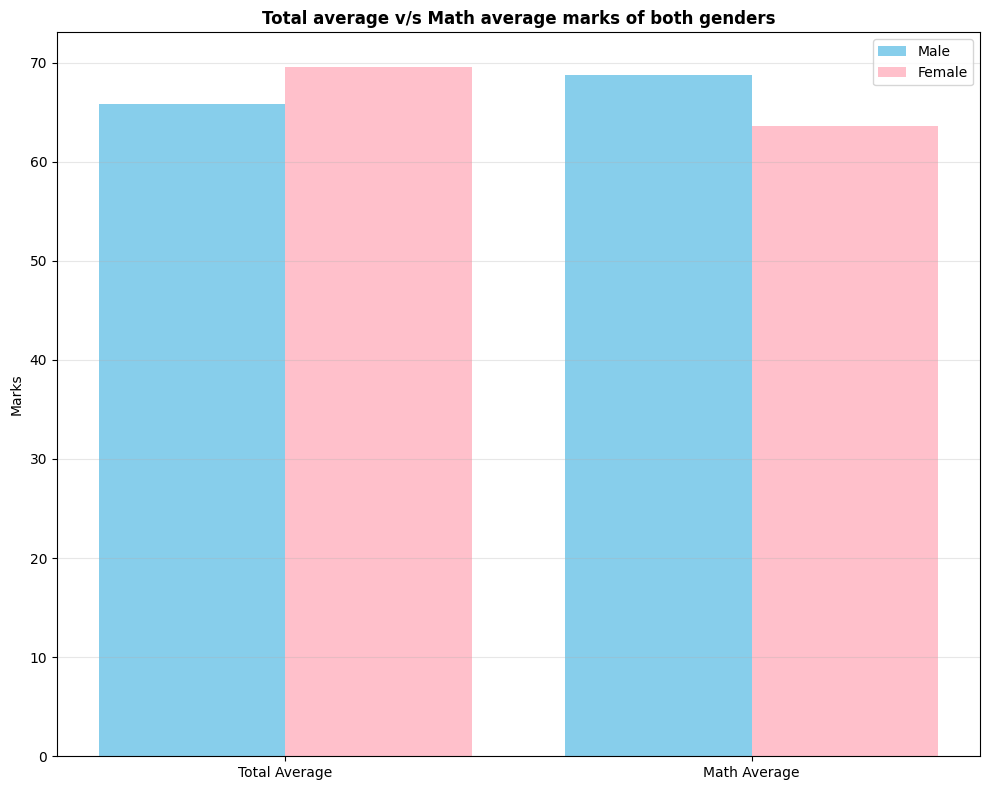


ALTERNATIVE: Dynamic column selection
Available numeric columns: ['math_score', 'reading_score', 'writing_score', 'total score', 'average']


<Figure size 1200x800 with 0 Axes>

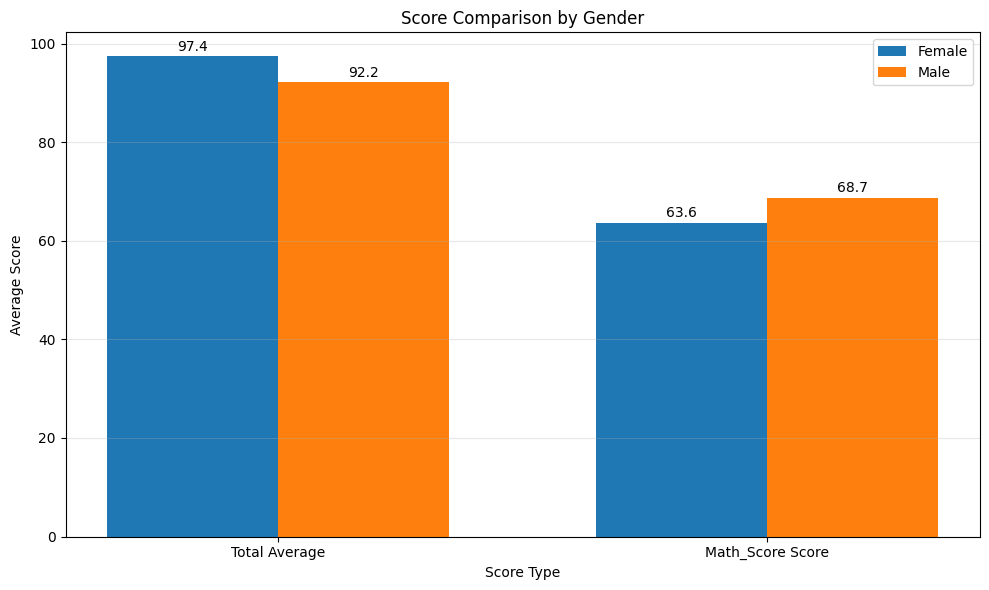

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# First, let's see what's actually in gender_group
print("Gender group columns:")
print(gender_group.columns.tolist())
print("\nGender group data:")
print(gender_group)
print("\nGender group index:")
print(gender_group.index.tolist())

# Create the 'average' column if it doesn't exist
# This assumes your score columns are the numeric ones in gender_group
if 'average' not in gender_group.columns:
    # Calculate average of all score columns
    gender_group['average'] = gender_group.mean(axis=1)
    print("\nCreated 'average' column:")
    print(gender_group['average'])

# Now let's identify the correct column names for math scores
# Common variations for math score column names
possible_math_cols = ['math score', 'math_score', 'mathematics', 'math', 'Math Score']
math_col = None

for col in possible_math_cols:
    if col in gender_group.columns:
        math_col = col
        break

if math_col is None:
    # If no math column found, use the first numeric column
    math_col = gender_group.columns[0]
    print(f"No 'math score' column found. Using '{math_col}' instead.")

print(f"Using math column: '{math_col}'")

# Create the bar chart
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Get the scores - adjust indexing based on your data
gender_order = gender_group.index.tolist()
print(f"Gender order in data: {gender_order}")

if 'female' in gender_order[0].lower():
    female_idx, male_idx = 0, 1
else:
    female_idx, male_idx = 1, 0

female_scores = [gender_group['average'].iloc[female_idx], gender_group[math_col].iloc[female_idx]]
male_scores = [gender_group['average'].iloc[male_idx], gender_group[math_col].iloc[male_idx]]

print(f"Female scores: {female_scores}")
print(f"Male scores: {male_scores}")

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='skyblue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='pink')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Alternative version if you want more flexibility
print("\n" + "="*50)
print("ALTERNATIVE: Dynamic column selection")
print("="*50)

# Create a more robust version that works with any dataset structure
plt.figure(figsize=(12, 8))

# Get all numeric columns
numeric_cols = gender_group.select_dtypes(include=[np.number]).columns.tolist()
print(f"Available numeric columns: {numeric_cols}")

if len(numeric_cols) >= 1:
    # Use first column as "math" and calculate average if multiple columns
    math_column = numeric_cols[0]
    
    if len(numeric_cols) > 1:
        # Calculate total average from all numeric columns
        total_avg = gender_group[numeric_cols].mean(axis=1)
    else:
        # If only one column, use it for both
        total_avg = gender_group[math_column]
    
    # Create comparison chart
    categories = ['Total Average', f'{math_column.title()} Score']
    
    # Get data for each gender
    genders = gender_group.index.tolist()
    
    x = np.arange(len(categories))
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, gender in enumerate(genders):
        scores = [total_avg.loc[gender], gender_group.loc[gender, math_column]]
        offset = (i - 0.5) * width
        bars = ax.bar(x + offset, scores, width, label=gender.title())
        
        # Add value labels on bars
        for bar, score in zip(bars, scores):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{score:.1f}', ha='center', va='bottom')
    
    ax.set_xlabel('Score Type')
    ax.set_ylabel('Average Score')
    ax.set_title('Score Comparison by Gender')
    ax.set_xticks(x)
    ax.set_xticklabels(categories)
    ax.legend()
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for plotting!")

#### Insights 
- On an average females have a better overall score than men.
- whereas males have scored higher in Maths.

#### 4.4.2 RACE/EHNICITY COLUMN
- How is Group wise distribution ?
- Is Race/Ehnicity has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

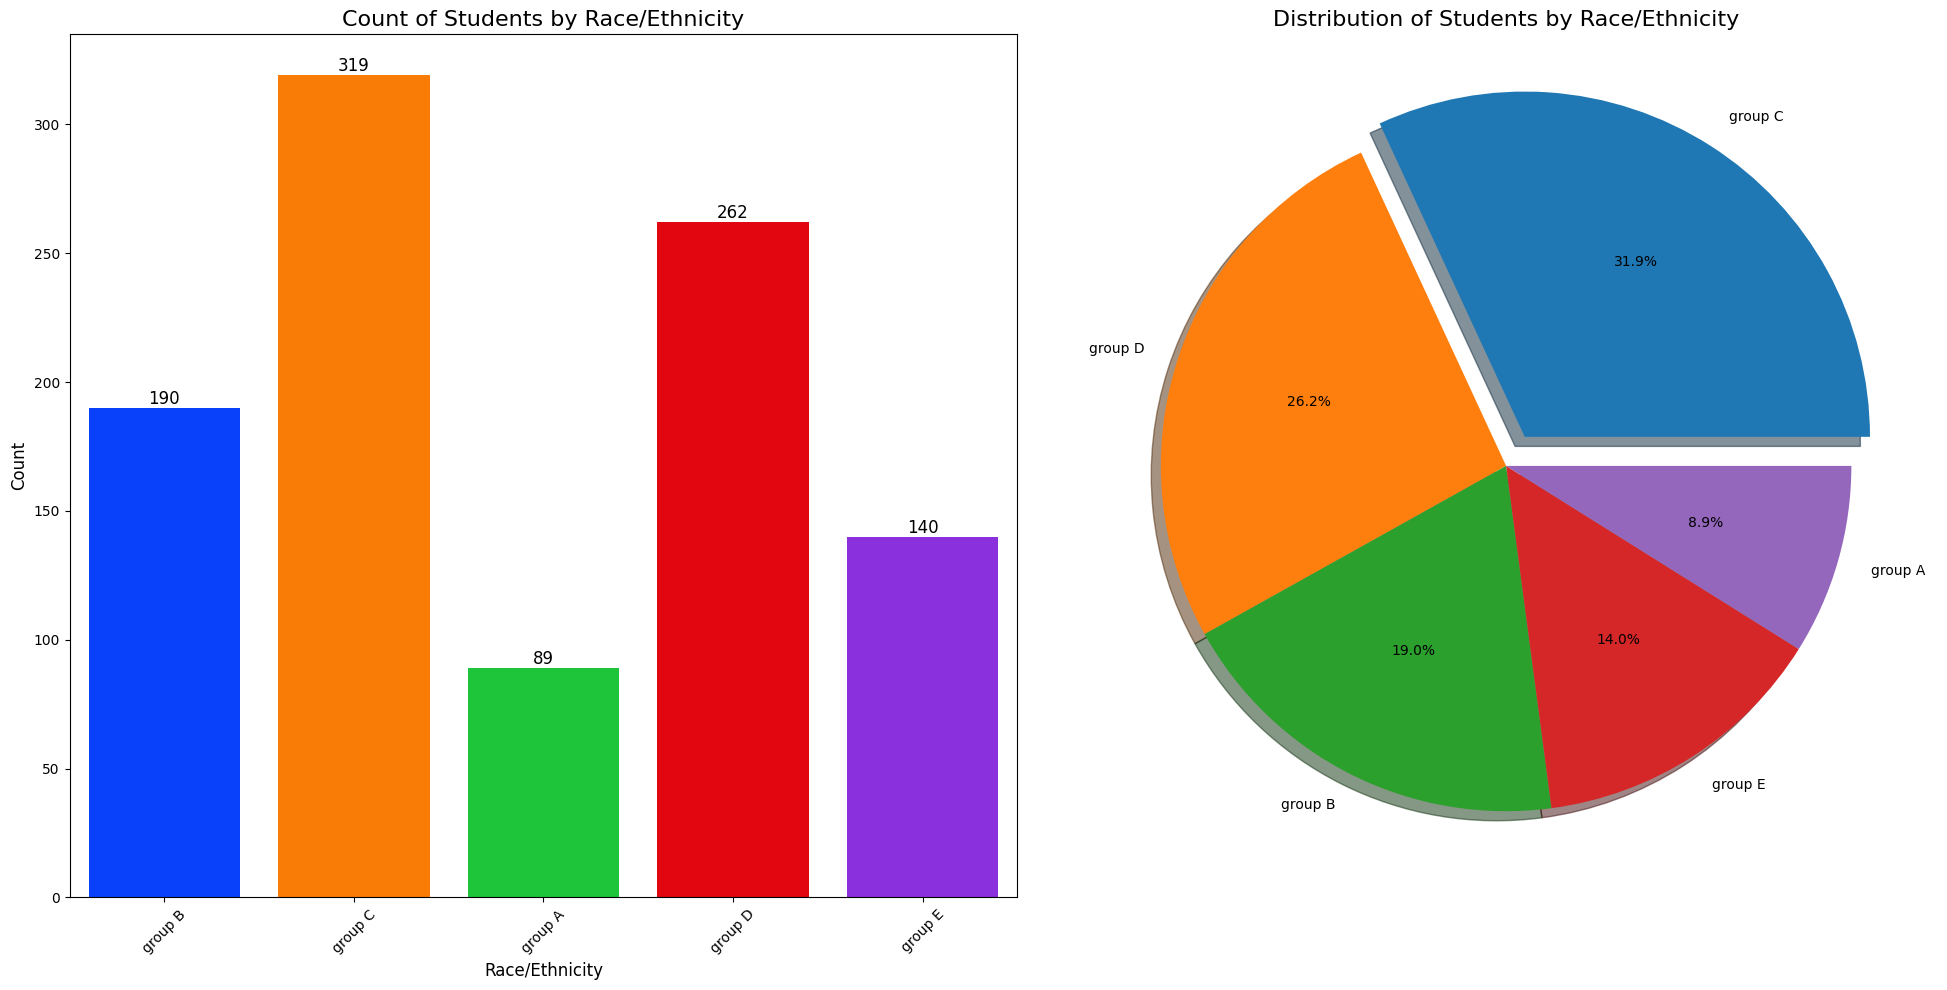

In [33]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# First subplot: Count plot
sns.countplot(data=df, x='race_ethnicity', palette='bright', ax=ax[0], saturation=0.95)
ax[0].set_title('Count of Students by Race/Ethnicity', fontsize=16)
ax[0].set_xlabel('Race/Ethnicity', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Second subplot: Pie chart
race_counts = df['race_ethnicity'].value_counts()
ax[1].pie(x=race_counts.values, 
          labels=race_counts.index.tolist(), 
          explode=[0.1, 0, 0, 0, 0], 
          autopct='%1.1f%%', 
          shadow=True)
ax[1].set_title('Distribution of Students by Race/Ethnicity', fontsize=16)

plt.tight_layout()
plt.show()

#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

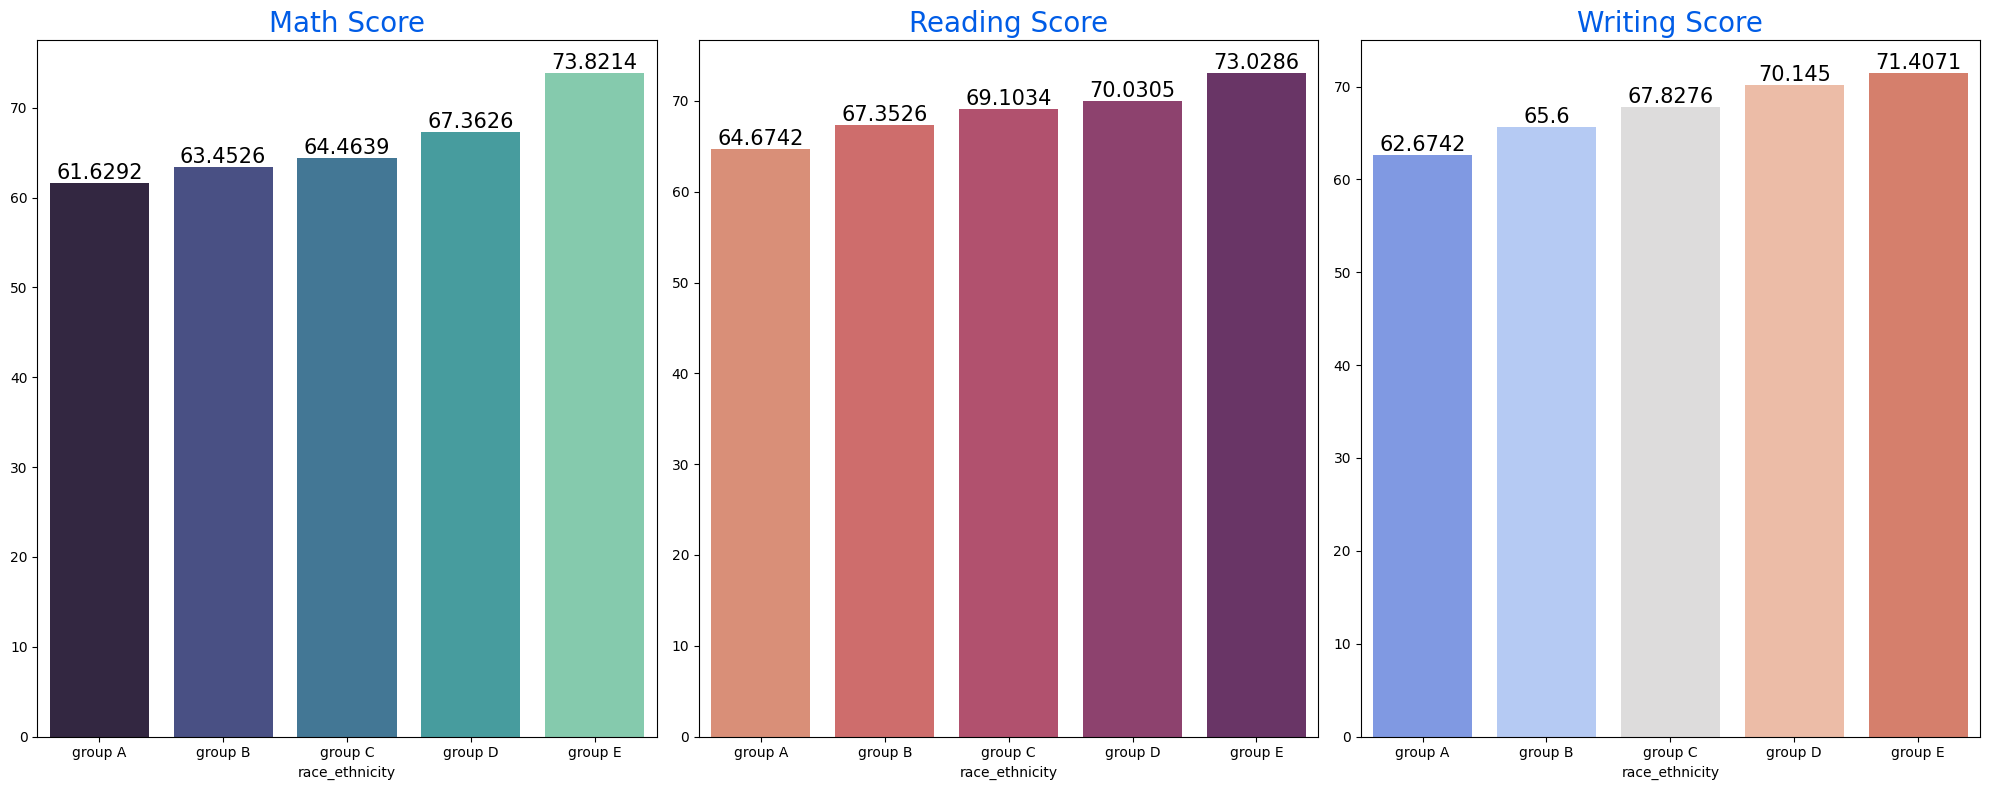

In [34]:
# Use the correct column names from your DataFrame
Group_data2 = df.groupby('race_ethnicity')  # Changed from 'race/ethnicity' to 'race_ethnicity'
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Math score plot
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako', ax=ax[0])  # Changed 'math score' to 'math_score'
ax[0].set_title('Math Score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Reading score plot  
sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare', ax=ax[1])  # Changed 'reading score' to 'reading_score'
ax[1].set_title('Reading Score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Writing score plot
sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values, palette='coolwarm', ax=ax[2])  # Changed 'writing score' to 'writing_score'
ax[2].set_title('Writing Score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.tight_layout()
plt.show()

#### Insights 
- Group E students have scored the highest marks. 
- Group A students have scored the lowest marks. 
- Students from a lower Socioeconomic status have a lower avg in all course subjects

#### 4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN
- What is educational background of student's parent ?
- Is parental education has any impact on student's performance ?

#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

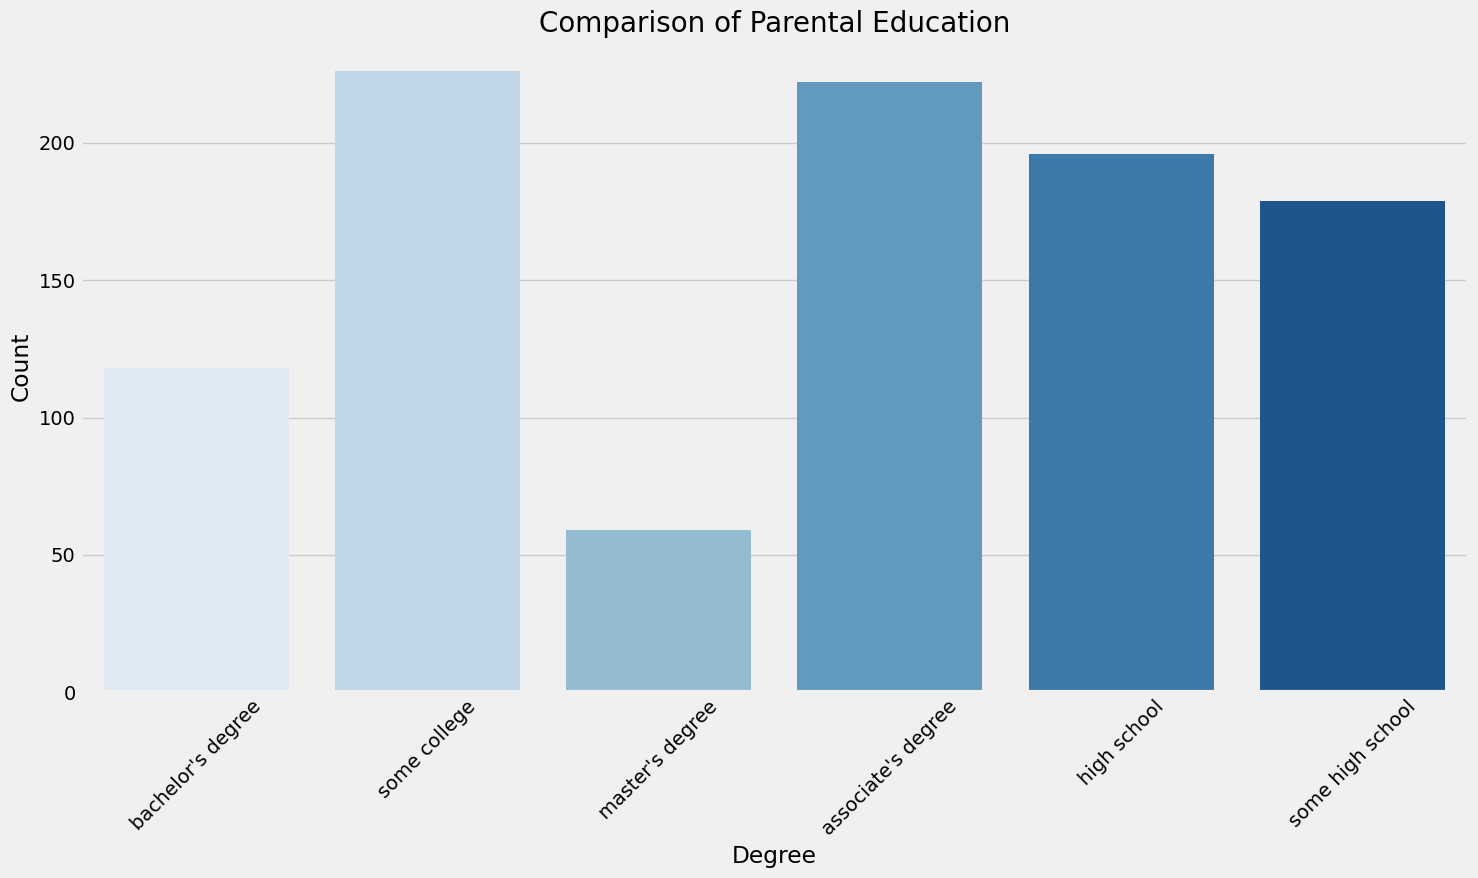

In [35]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')  # Fixed: added data=df, x=, and correct column name
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Added to rotate x-axis labels for better readability
plt.tight_layout()  # Added to prevent label cutoff
plt.show()

#### Insights 
- Largest number of parents are from some college.

#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

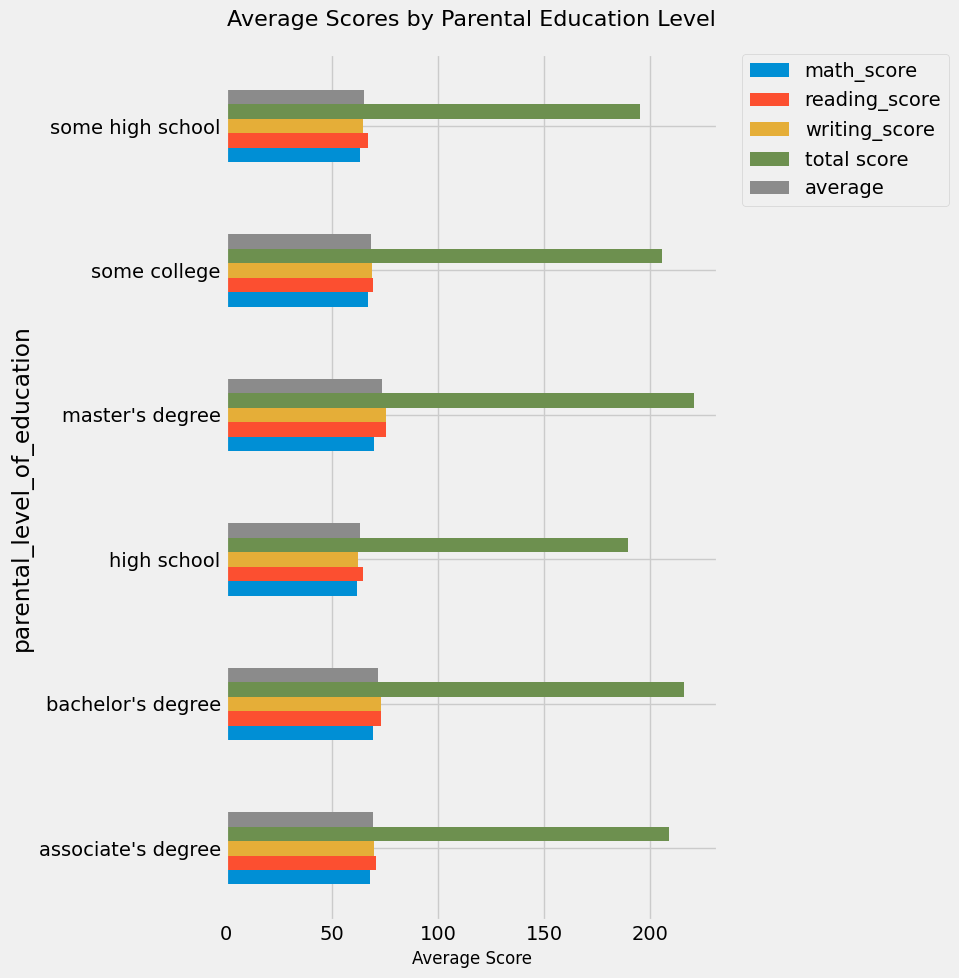

In [36]:
# Select only numeric columns for mean calculation
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'total score', 'average']
df.groupby('parental_level_of_education')[numeric_cols].agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average Scores by Parental Education Level', fontsize=16, pad=20)
plt.xlabel('Average Score', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights 
- The score of student whose parents possess master and bachelor level education are higher than others.

#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

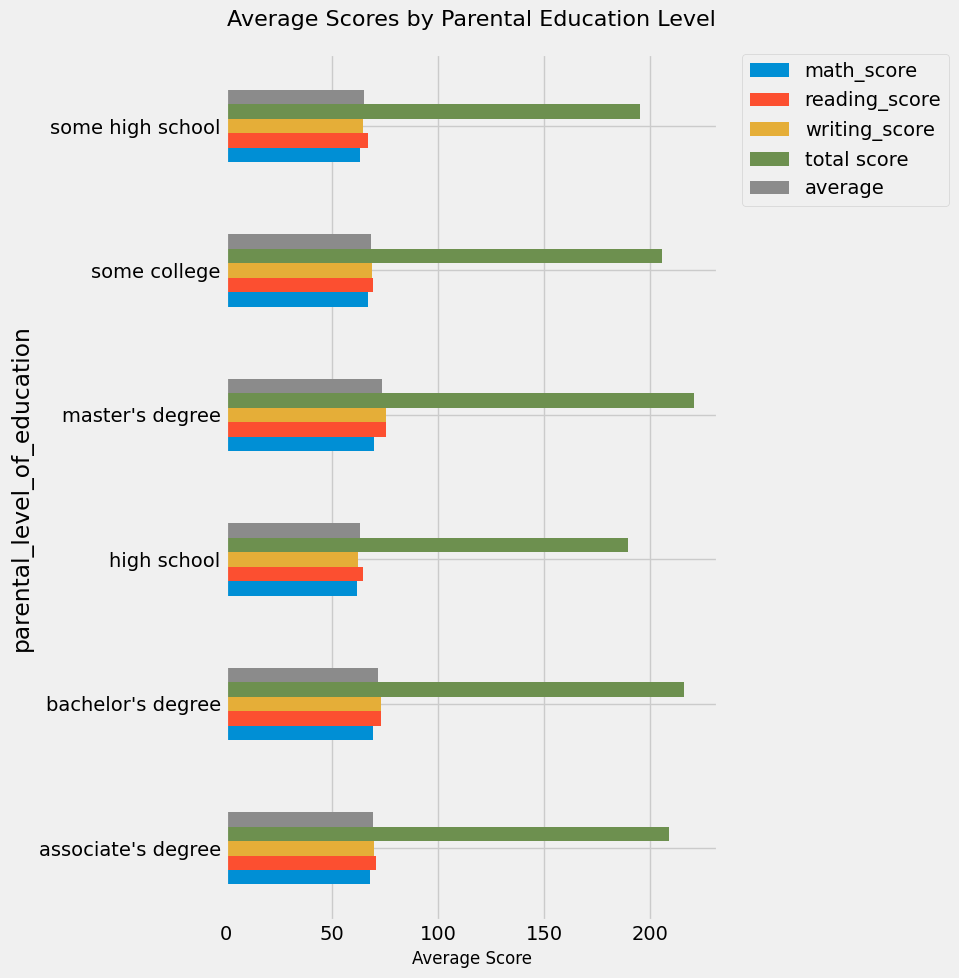

In [37]:
# Select only numeric columns for mean calculation
numeric_cols = ['math_score', 'reading_score', 'writing_score', 'total score', 'average']
df.groupby('parental_level_of_education')[numeric_cols].agg('mean').plot(kind='barh', figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Average Scores by Parental Education Level', fontsize=16, pad=20)
plt.xlabel('Average Score', fontsize=12)
plt.tight_layout()
plt.show()

#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

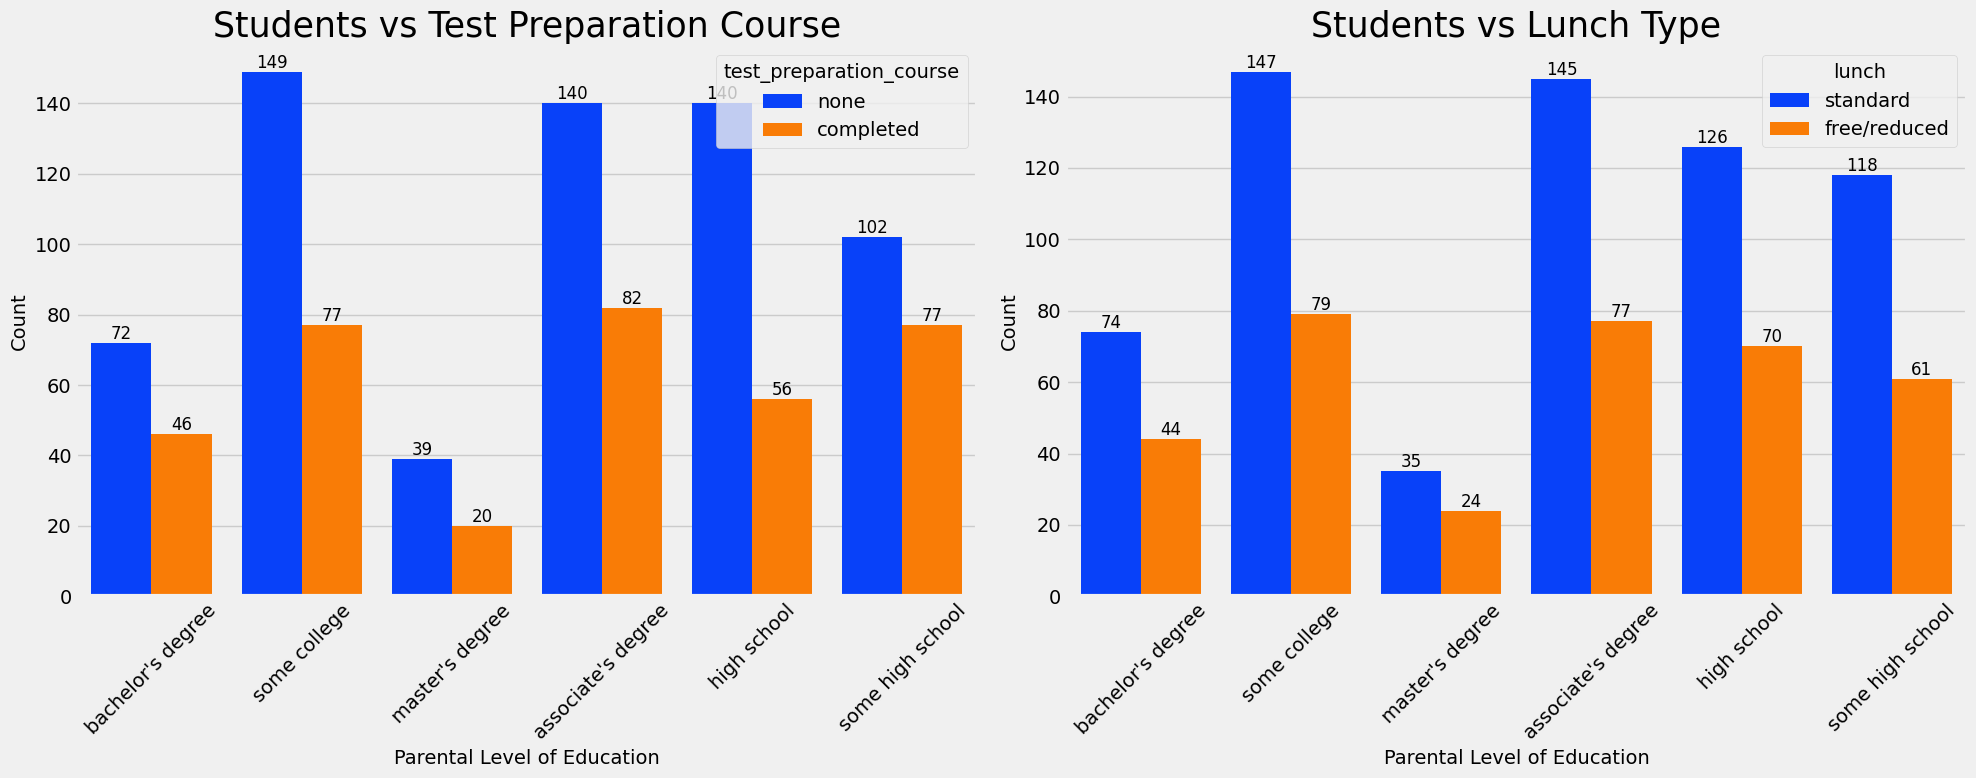

In [38]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Students vs test preparation course
sns.countplot(data=df, x='parental_level_of_education', hue='test_preparation_course', palette='bright', saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
ax[0].set_xlabel('Parental Level of Education', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].tick_params(axis='x', rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

# Second subplot: Students vs lunch type
sns.countplot(data=df, x='parental_level_of_education', hue='lunch', palette='bright', saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
ax[1].set_xlabel('Parental Level of Education', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)
ax[1].tick_params(axis='x', rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=12)

plt.tight_layout()
plt.show()

#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

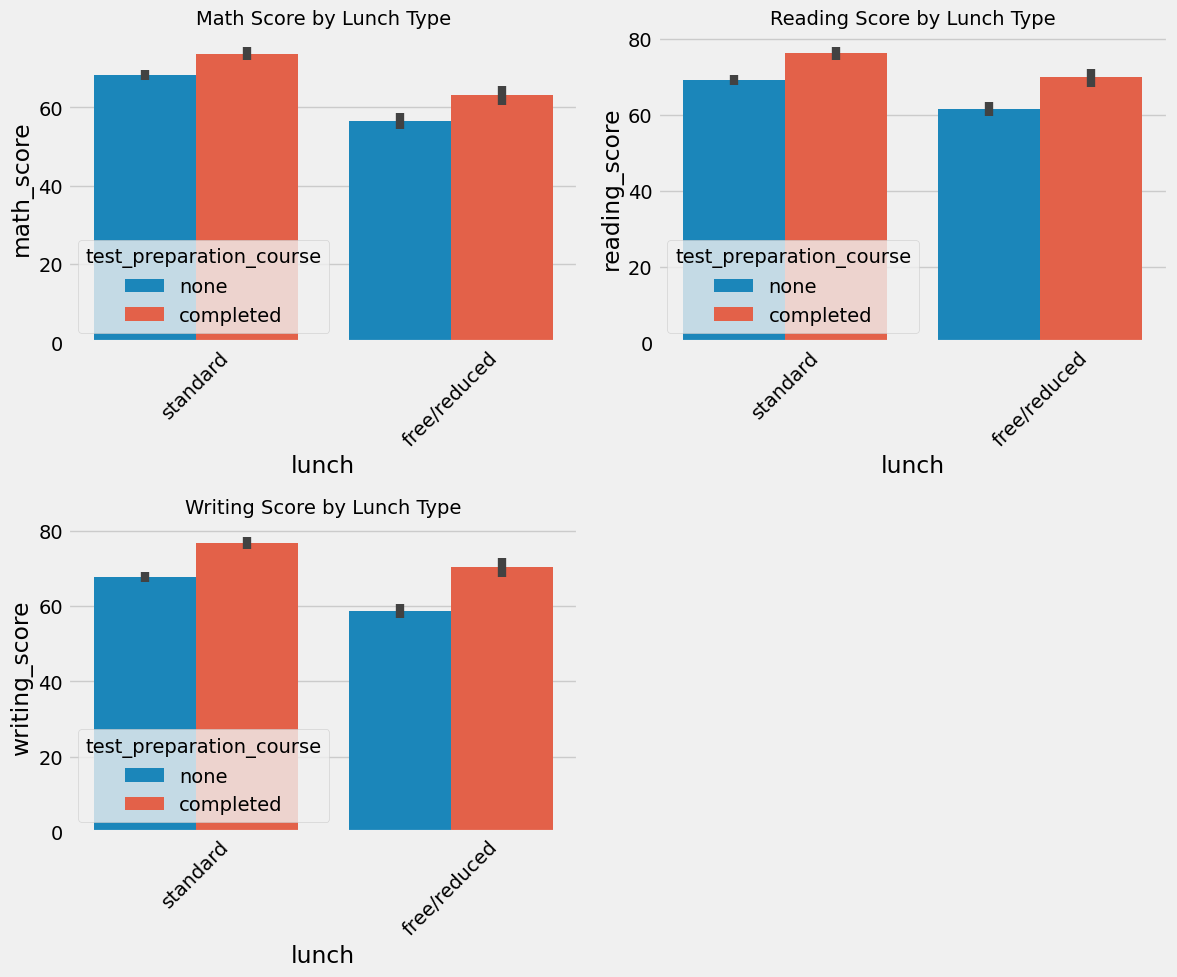

In [39]:
plt.figure(figsize=(12,10))  # Increased height for better layout

plt.subplot(2,2,1)
sns.barplot(data=df, x='lunch', y='math_score', hue='test_preparation_course')
plt.title('Math Score by Lunch Type', fontsize=14)
plt.xticks(rotation=45)

plt.subplot(2,2,2)
sns.barplot(data=df, x='lunch', y='reading_score', hue='test_preparation_course')
plt.title('Reading Score by Lunch Type', fontsize=14)
plt.xticks(rotation=45)

plt.subplot(2,2,3)
sns.barplot(data=df, x='lunch', y='writing_score', hue='test_preparation_course')
plt.title('Writing Score by Lunch Type', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

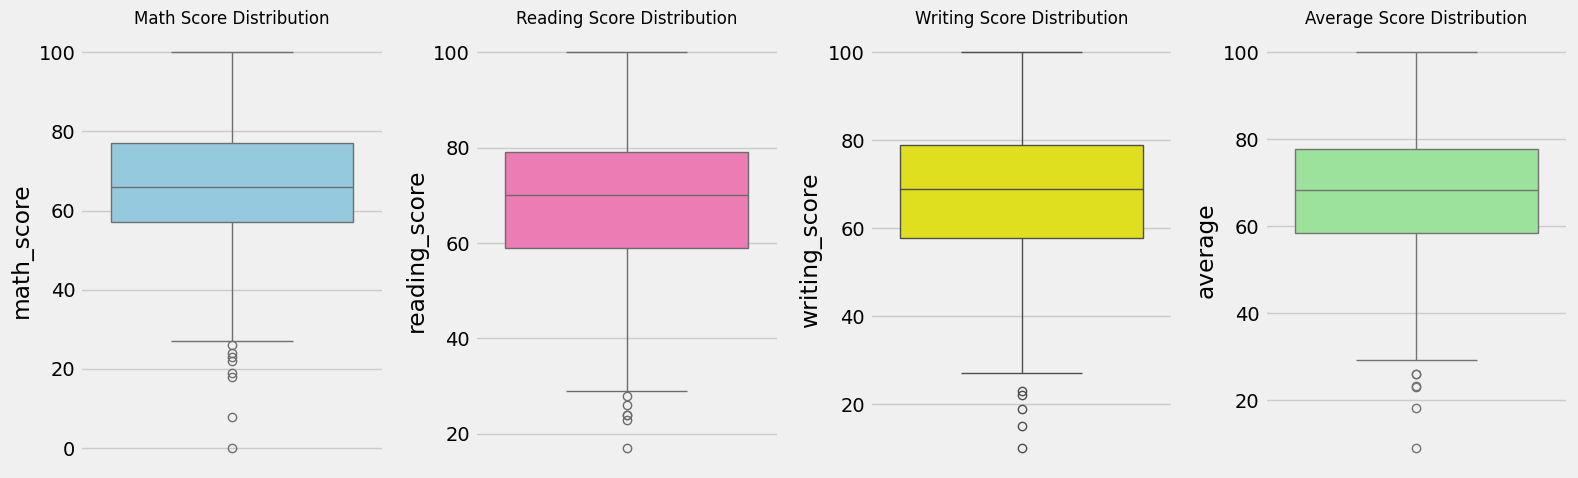

In [40]:
plt.subplots(1,4,figsize=(16,5))

plt.subplot(141)
sns.boxplot(data=df, y='math_score', color='skyblue')
plt.title('Math Score Distribution', fontsize=12)

plt.subplot(142)
sns.boxplot(data=df, y='reading_score', color='hotpink')
plt.title('Reading Score Distribution', fontsize=12)

plt.subplot(143)
sns.boxplot(data=df, y='writing_score', color='yellow')
plt.title('Writing Score Distribution', fontsize=12)

plt.subplot(144)
sns.boxplot(data=df, y='average', color='lightgreen')
plt.title('Average Score Distribution', fontsize=12)

plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

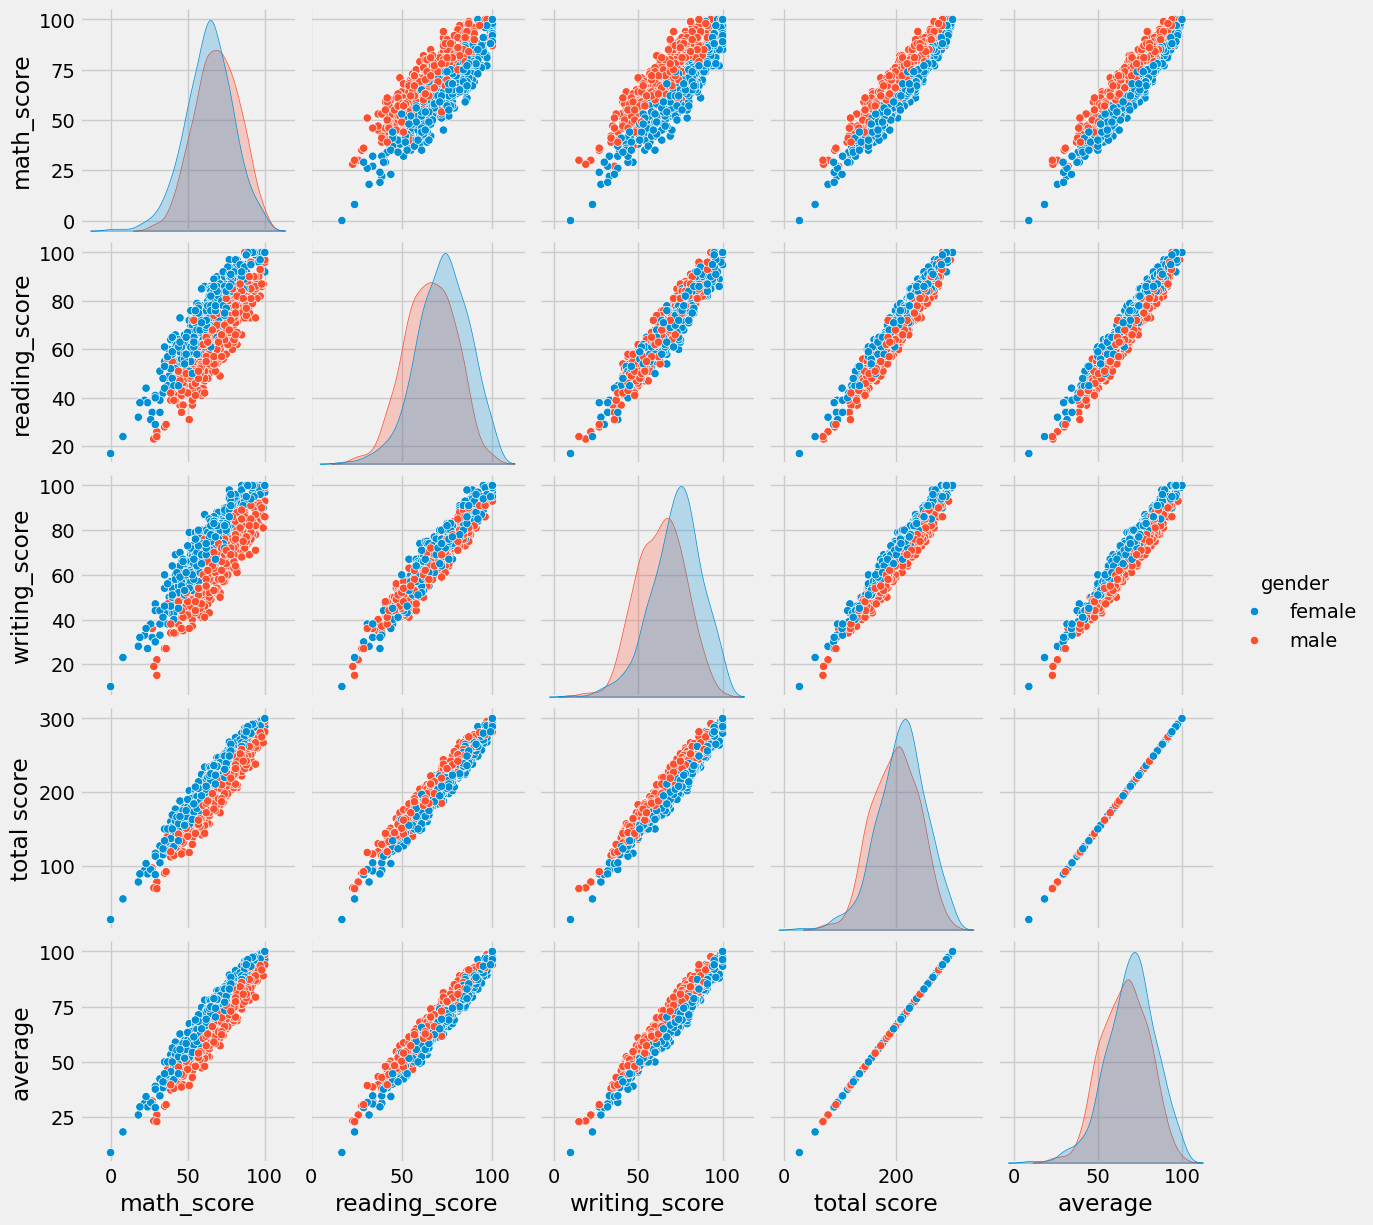

In [41]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
- From the above plot it is clear that all the scores increase linearly with each other.

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.